In [1]:
!pip install tensorflow
import numpy as np
import tensorflow as tf
import keras
from google.colab import drive
import os

drive.mount('/content/drive')
#KGAT_9df4ee16d136d4ed86c077d0082de440
# Define a path in Google Drive for your dataset
# You can change 'MyDrive/Colab_Datasets' to your preferred folder structure in Google Drive
gdrive_dataset_base_path = '/content/drive/MyDrive/Colab_Datasets'
os.makedirs(gdrive_dataset_base_path, exist_ok=True) # Ensure the directory exists

print(f"Google Drive mounted. Datasets will be stored in: {gdrive_dataset_base_path}")

Mounted at /content/drive
Google Drive mounted. Datasets will be stored in: /content/drive/MyDrive/Colab_Datasets


In [ ]:
! tar -zcf Training_Data.tar.gz /content/drive/MyDrive/Colab_Datasets/Training_Data --warning=none
! cp /content/drive/MyDrive/Colab_Datasets/Training_Data.tar.gz /content/

tar: Removing leading `/' from member names
^C
cp: cannot stat '/content/drive/MyDrive/Colab_Datasets/Training_Data.tar.gz': No such file or directory


Contents of the dataset directory:
/content/drive/MyDrive/Colab_Datasets/Training_Data
20000

Found n image: /content/drive/MyDrive/Colab_Datasets/Training_Data/Adobe Firefly/img_106.png


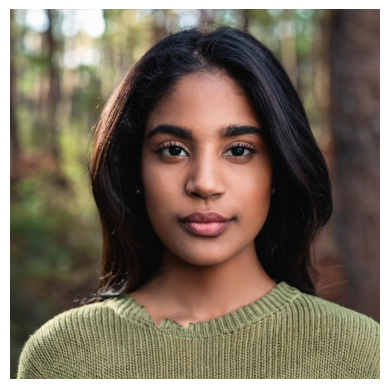

In [3]:
# Extract 20k open and closed set image file paths

import os
from PIL import Image
import matplotlib.pyplot as plt

# Assuming the images are in a subdirectory within the downloaded path
# We need to find the actual path to the images.
# Let's list the contents of the downloaded path first to see the structure.
print("Contents of the dataset directory:")
image_files = []
ai_models = []

training_data_path = os.path.join(gdrive_dataset_base_path, 'Training_Data')
print(training_data_path)
for root, dirs, files in os.walk(training_data_path):
    for file in files:
      if file.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_files.append(os.path.join(root, file))

ai_models = os.listdir(training_data_path)
print(len(image_files))
#print(ai_models)
# Check if there are enough images
if len(image_files) >= 1:
    image_path = image_files[0] # Get the 1000th image (index 999)
    print(f"\nFound n image: {image_path}")
    try:
        img = Image.open(image_path)
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        plt.show()
    except Exception as e:
        print(f"Error opening or displaying image: {e}")
else:
    print(f"\nOnly {len(image_files)} image files found in the dataset directory. Cannot display the 1000th image.")


Contents of the dataset directory:
/content/drive/MyDrive/Colab_Datasets/Test_Data_PP
20000

Found n image: /content/drive/MyDrive/Colab_Datasets/Test_Data_PP/Adobe Firefly/PP/step3/img_11_step1_Central_Crop_step2_Super_Resolution_step3_Greyscale.png


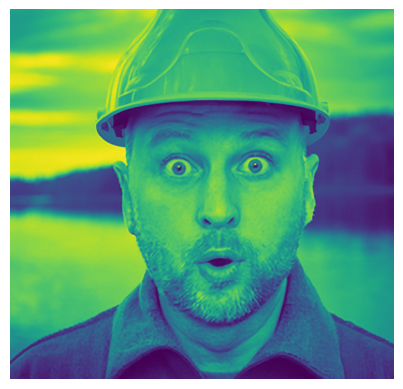

In [4]:
#Extract post processed images

# Assuming the images are in a subdirectory within the downloaded path
# We need to find the actual path to the images.
# Let's list the contents of the dataset directory first to see the structure.
print("Contents of the dataset directory:")
pp_image_files = []
pp_ai_models = []
pp_labels = []

pp_data_path = os.path.join(gdrive_dataset_base_path, 'Test_Data_PP')
print(pp_data_path)
for root, dirs, files in os.walk(pp_data_path):
    for file in files:
      if file.lower().endswith(('.png', '.jpg', '.jpeg')) and 'step1'  in file.lower() and 'step2'  in file.lower() and 'step3' in file.lower():
        pp_image_files.append(os.path.join(root, file))
        # Extract the model name from the path. Assuming path structure like:
        # /content/drive/MyDrive/Colab_Datasets/Test_Data_PP/ModelName/PP/step3/image.png
        model_name = os.path.basename(os.path.dirname(os.path.dirname(root)))
        pp_labels.append(model_name)

pp_ai_models = os.listdir(pp_data_path)
print(len(pp_image_files))
#print(pp_ai_models)
#print(pp_labels)
# Check if there are enough images
if len(pp_image_files) >= 1:
    pp_image_path = pp_image_files[0] # Get the 1000th image (index 999)
    print(f"\nFound n image: {pp_image_path}")
    try:
        img = Image.open(pp_image_path)
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        plt.show()
    except Exception as e:
        print(f"Error opening or displaying image: {e}")
else:
    print(f"\nOnly {len(pp_image_files)} image files found in the dataset directory. Cannot display the 1000th image.")


In [3]:
#FOR TRAINING ON 20K Regular


IMG_SIZE = (380,380)
BATCH_SIZE = 32

# Ensure training_data_path is correctly set for training data
training_data_path = os.path.join(gdrive_dataset_base_path, 'Training_Data')

# Create training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    training_data_path,
    labels='inferred',
    label_mode='int',
    image_size=IMG_SIZE,
    interpolation='nearest',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=123, # Set a seed for reproducibility
    validation_split=0.1, # Allocate 20% of the data for validation
    subset='training' # Specify this subset is for training
)

# Create validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    training_data_path,
    labels='inferred',
    label_mode='int',
    image_size=IMG_SIZE,
    interpolation='nearest',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=123, # Use the same seed as training for consistent split
    validation_split=0.1, # Allocate 20% of the data for validation
    subset='validation' # Specify this subset is for validation
)

print(f"Number of training batches: {tf.data.experimental.cardinality(train_ds).numpy()}")
print(f"Number of validation batches: {tf.data.experimental.cardinality(val_ds).numpy()}")
print(f"Number of training images: {tf.data.experimental.cardinality(train_ds).numpy() * BATCH_SIZE}")
print(f"Number of validation images: {tf.data.experimental.cardinality(val_ds).numpy() * BATCH_SIZE}")

# Optionally, you can print the class names and number of classes
class_names = train_ds.class_names
num_classes = len(class_names)
print(f"\nClass names: {class_names}")
print(f"Number of classes: {num_classes}")

Found 20000 files belonging to 20 classes.
Using 18000 files for training.
Found 20000 files belonging to 20 classes.
Using 2000 files for validation.
Number of training batches: 563
Number of validation batches: 63
Number of training images: 18016
Number of validation images: 2016

Class names: ['Adobe Firefly', 'Dall-E 1', 'Dall-E 3', 'Deep AI', 'Flux.1', 'Flux.1.1 Pro', 'Freepik', 'Hotpot AI', 'Leonardo AI', 'Midjourney', 'Nvidia Sana PAG', 'Stable Cascade', 'Stable Diffusion 3.5', 'Stable Diffusion Attend and Excite', 'Stable Diffusion XL', 'Starry AI', 'StyleGAN', 'StyleGAN2', 'StyleGAN3', 'Tencent_Hunyuan']
Number of classes: 20


In [ ]:
#FOR TESTING ON 10k PP step 3
base_dir = '/content/drive/MyDrive/Colab_Datasets/Test_Data_PP/step3'

print("Using directory:", base_dir)
print(os.listdir(base_dir))

test_data_path = os.path.join(gdrive_dataset_base_path, 'Test_Data_PP/step3')
IMG_SIZE = (380,380)
BATCH_SIZE = 32


# Create testing dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_data_path,
    labels='inferred',
    label_mode='int',
    image_size=IMG_SIZE,
    interpolation='nearest',
    shuffle=False,
    seed=123, # Set a seed for reproducibility
)




# Optionally, you can print the class names and number of classes
class_names = test_ds.class_names
num_classes = len(class_names)
print(f"\nClass names: {class_names}")
print(f"Number of classes: {num_classes}")

Using directory: /content/drive/MyDrive/Colab_Datasets/Test_Data_PP/step3
['Adobe Firefly', 'Dall-E 3', 'Flux.1.1 Pro', 'Flux.1', 'Freepik', 'Leonardo AI', 'Midjourney', 'Stable Diffusion 3.5', 'Stable Diffusion XL', 'Starry AI', 'Dall-E 1', 'Deep AI', 'Hotpot AI', 'Nvidia Sana PAG', 'Stable Cascade', 'Stable Diffusion Attend and Excite', 'StyleGAN', 'StyleGAN2', 'Tencent_Hunyuan', 'StyleGAN3']
Found 10000 files belonging to 20 classes.

Class names: ['Adobe Firefly', 'Dall-E 1', 'Dall-E 3', 'Deep AI', 'Flux.1', 'Flux.1.1 Pro', 'Freepik', 'Hotpot AI', 'Leonardo AI', 'Midjourney', 'Nvidia Sana PAG', 'Stable Cascade', 'Stable Diffusion 3.5', 'Stable Diffusion Attend and Excite', 'Stable Diffusion XL', 'Starry AI', 'StyleGAN', 'StyleGAN2', 'StyleGAN3', 'Tencent_Hunyuan']
Number of classes: 20


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB4

import pandas as pd

num_classes = len(ai_models)

# Load the pre-trained EfficientNetB4 model
# Set include_top=False to remove the classification layer
base_model = tf.keras.applications.EfficientNetB4(input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3),
                                                   include_top=False,
                                                   weights='imagenet')

# Freeze the base model layers so they are not trained
base_model.trainable = False

# Create a new model on top of the pre-trained base
model = Sequential([
    base_model,
    GlobalAveragePooling2D(), # Use GlobalAveragePooling2D instead of Flatten for better performance with CNNs
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Print the model summary
model.summary()

71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb4 (Functional)     │ (None, 12, 12, 1792)   │    17,673,823 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1792)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       459,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 22)             │         5,654 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,138,485 (69.19 MB)

 Trainable params: 464,662 (1.77 MB)

 Non-trainable params: 17,673,823 (67.42 MB)

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Model compiled successfully.")


Model compiled successfully.


In [ ]:
history = model.fit(
    train_ds,
    epochs=10,  # debugging
    validation_data=val_ds,
)

Epoch 1/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 626s 1s/step - accuracy: 0.5033 - loss: 1.5978 - val_accuracy: 0.7870 - val_loss: 0.6590
Epoch 2/10
 55/563 ━━━━━━━━━━━━━━━━━━━━ 6:05 719ms/step - accuracy: 0.7686 - loss: 0.6681

KeyboardInterrupt: 

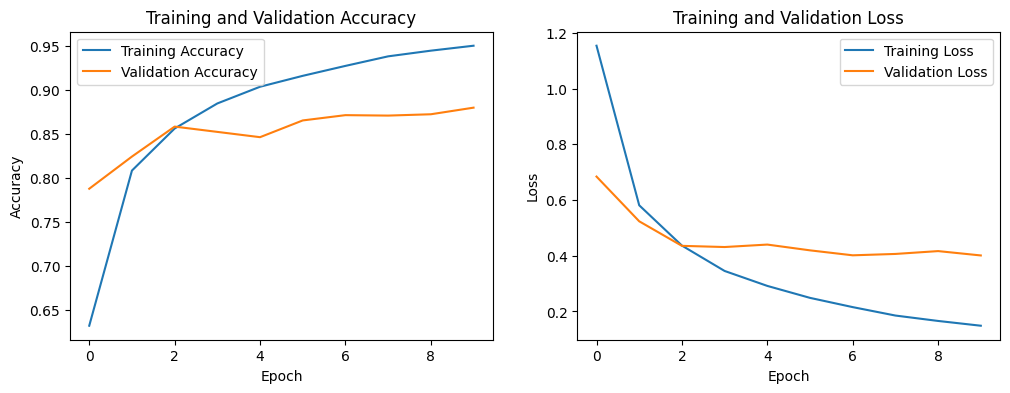

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:

model_save_name = 'EFNB4_20k_Frozen_380.keras'
model_save_path = os.path.join(gdrive_dataset_base_path, model_save_name)
model.save(model_save_path)

In [ ]:
base_model.trainable = True
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb4 (Functional)     │ (None, 12, 12, 1792)   │    17,673,823 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1792)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       459,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 22)             │         5,654 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,067,811 (72.74 MB)

 Trainable params: 18,013,278 (68.72 MB)

 Non-trainable params: 125,207 (489.09 KB)

 Optimizer params: 929,326 (3.55 MB)

In [ ]:

from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Model compiled successfully.")

history2 = model.fit(
    train_ds,
    epochs=10,  # debugging
    validation_data=val_ds,
)


Model compiled successfully.
Epoch 1/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 343s 341ms/step - accuracy: 0.5212 - loss: 1.8692 - val_accuracy: 0.8200 - val_loss: 0.5445
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 90s 159ms/step - accuracy: 0.8555 - loss: 0.4326 - val_accuracy: 0.8935 - val_loss: 0.3327
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 90s 159ms/step - accuracy: 0.9247 - loss: 0.2306 - val_accuracy: 0.9215 - val_loss: 0.2470
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 90s 159ms/step - accuracy: 0.9502 - loss: 0.1541 - val_accuracy: 0.9385 - val_loss: 0.1952
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 90s 159ms/step - accuracy: 0.9689 - loss: 0.0974 - val_accuracy: 0.9470 - val_loss: 0.1642
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 89s 159ms/step - accuracy: 0.9796 - loss: 0.0656 - val_accuracy: 0.9555 - val_loss: 0.1444
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 89s 159ms/step - accuracy: 0.9869 - loss: 0.0471 - val_accuracy: 0.9610 - val_loss: 0.1249
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 90s 159ms/ste

In [ ]:

model_save_name = 'EFNB4_20k_Trainable_380.keras'
model_save_path = os.path.join(gdrive_dataset_base_path, model_save_name)
model.save(model_save_path)

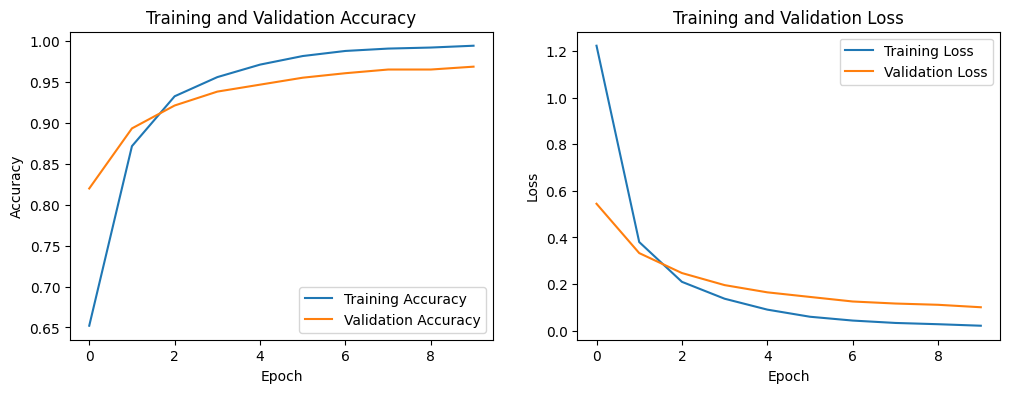

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
#Load model from memory
loaded_model = tf.keras.models.load_model(os.path.join(gdrive_dataset_base_path, 'EFNB4_20k_Trainable_380.keras'))

# Show the model architecture
loaded_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb4 (Functional)     │ (None, 12, 12, 1792)   │    17,673,823 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1792)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       459,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 22)             │         5,654 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,165,043 (206.62 MB)

 Trainable params: 18,013,278 (68.72 MB)

 Non-trainable params: 125,207 (489.09 KB)

 Optimizer params: 36,026,558 (137.43 MB)

In [ ]:
#Run saved model on PP images

# Create a new model on top of the pre-trained base

# Compile the model
loaded_model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Model compiled successfully.")

loss, acc = loaded_model.evaluate(test_ds, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

Model compiled successfully.
313/313 - 73s - 232ms/step - accuracy: 0.7392 - loss: 1.1524
Restored model, accuracy: 73.92%


In [ ]:
import numpy as np

# Get model predictions
predictions = loaded_model.predict(test_ds)

# Extract true labels
true_labels = []
for _, labels in test_ds:
    true_labels.extend(labels.numpy())
true_labels = np.array(true_labels)

print("Predictions shape:", predictions.shape)
print("True labels shape:", true_labels.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 72s 184ms/step
Predictions shape: (10000, 22)
True labels shape: (10000,)


In [ ]:
predicted_labels = np.argmax(predictions, axis=1)
misclassified_indices = np.where(predicted_labels != true_labels)[0]

print(f"Number of misclassified images: {len(misclassified_indices)}")
print(f"Sample misclassified indices: {misclassified_indices[:10]}")

Number of misclassified images: 2608
Sample misclassified indices: [10 13 16 22 33 43 44 47 56 57]


In [ ]:
misclassified_filepaths = []
misclassified_true_labels = []
misclassified_predicted_labels = []

# Get all file paths and their corresponding labels directly from the directory structure
all_files_in_order = []
all_true_labels_from_files = []

# Ensure class_names is available from previous steps
class_to_idx = {name: idx for idx, name in enumerate(class_names)}

# Recursively find all image files and their labels
# The test_data_path is expected to be '/content/drive/MyDrive/Colab_Datasets/Test_Data_PP/step3'
# and contains subdirectories like 'Adobe Firefly', 'Dall-E 1', etc.
for root, _, files in os.walk(test_data_path):
    # Extract the model_dir (class name) from the current root directory
    # e.g., for /content/drive/MyDrive/Colab_Datasets/Test_Data_PP/step3/Adobe Firefly, model_dir will be 'Adobe Firefly'
    model_dir = os.path.basename(root)

    # Only process directories that correspond to known class names
    if model_dir in class_to_idx:
        for file in sorted(files): # Sort to match image_dataset_from_directory's default order (if shuffle=False)
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                file_path = os.path.join(root, file)
                all_files_in_order.append(file_path)
                all_true_labels_from_files.append(class_to_idx[model_dir])

# Convert to numpy array for easy indexing
all_files_in_order = np.array(all_files_in_order)
all_true_labels_from_files = np.array(all_true_labels_from_files)

# It's good practice to verify that the true_labels extracted this way match the true_labels from test_ds
# In a real scenario, if they don't match, it indicates a problem with file ordering or label extraction.
# For this task, we will proceed assuming they are aligned, as test_ds was created with shuffle=False and a fixed seed.

# Retrieve information for misclassified images using the pre-computed misclassified_indices
for idx in misclassified_indices:
    misclassified_filepaths.append(all_files_in_order[idx])
    misclassified_true_labels.append(true_labels[idx]) # Use true_labels from test_ds for consistency
    misclassified_predicted_labels.append(predicted_labels[idx])

print(f"Number of misclassified file paths retrieved: {len(misclassified_filepaths)}")
print(f"Sample misclassified file path: {misclassified_filepaths[0]}")
print(f"Sample misclassified true label: {misclassified_true_labels[0]}")
print(f"Sample misclassified predicted label: {misclassified_predicted_labels[0]}")

Number of misclassified file paths retrieved: 2608
Sample misclassified file path: /content/drive/MyDrive/Colab_Datasets/Test_Data_PP/step3/Adobe Firefly/img_109_step1_Brightness_Increase_step2_Rotation_step3_Super_Resolution.png
Sample misclassified true label: 0
Sample misclassified predicted label: 7


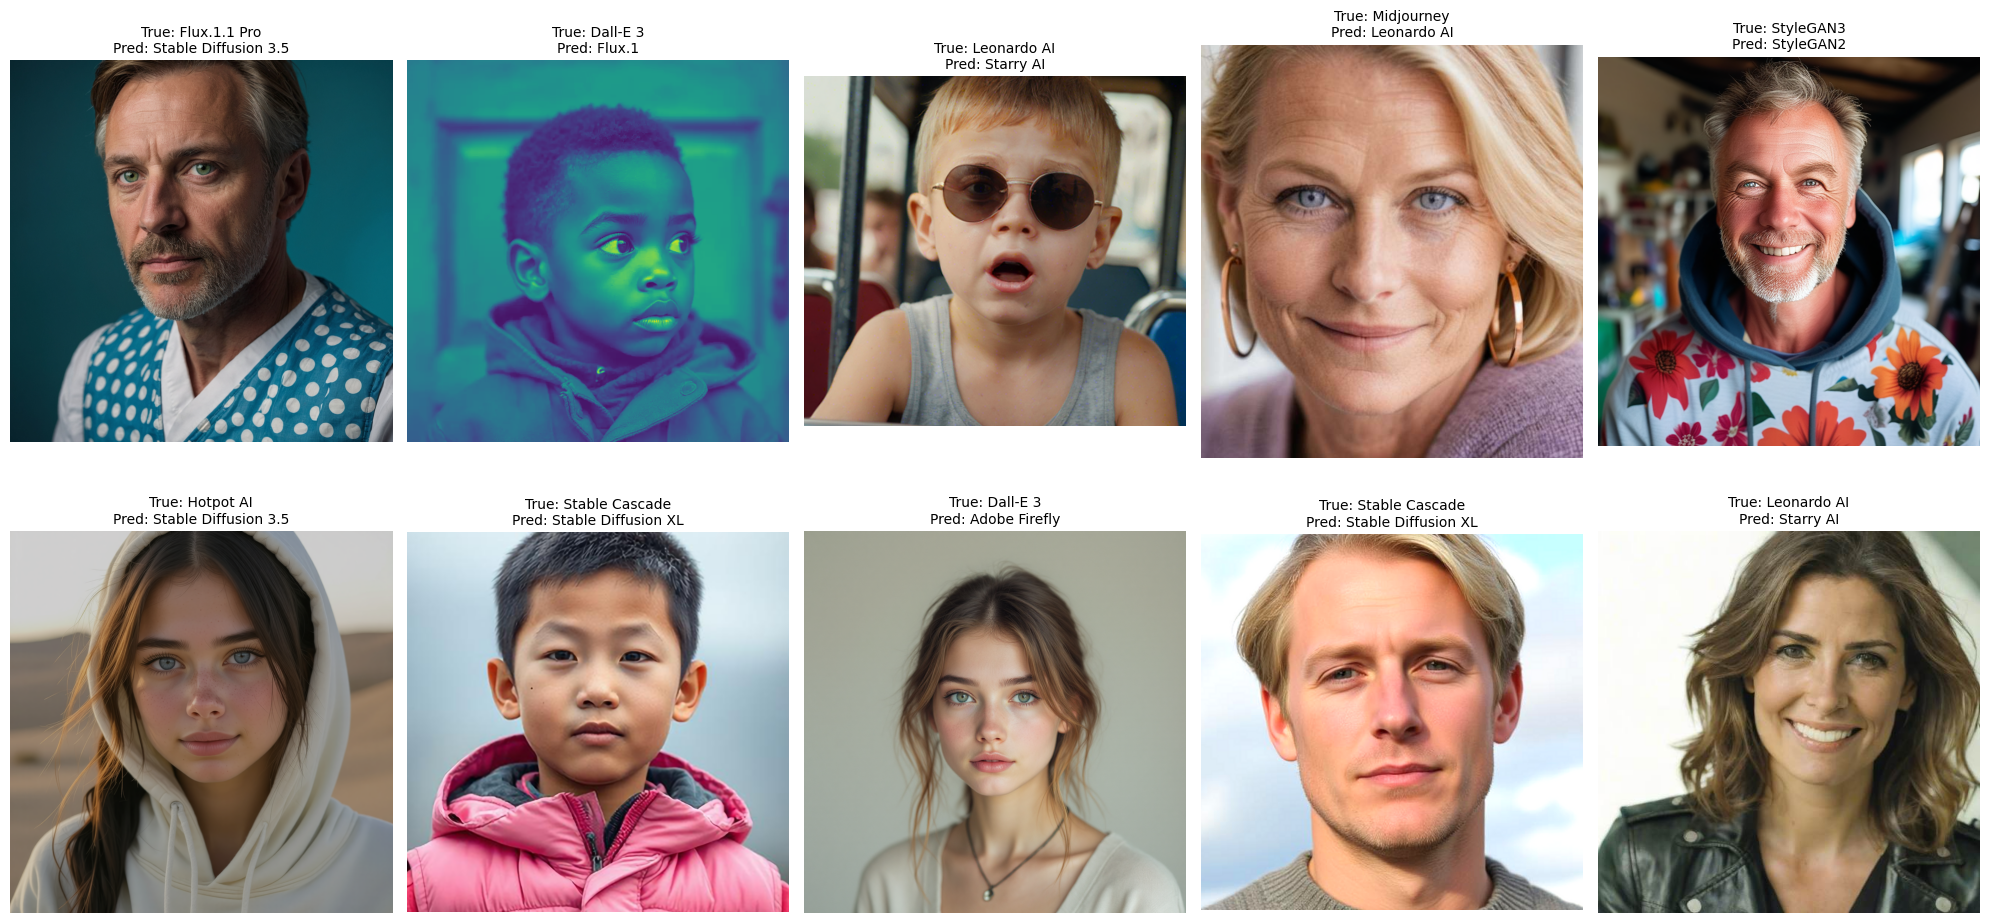

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import random

num_samples_to_display = 10 # Display 10 random misclassified images

# Get a random sample of misclassified indices
sample_indices = random.sample(range(len(misclassified_filepaths)), min(num_samples_to_display, len(misclassified_filepaths)))

plt.figure(figsize=(20, 10))
for i, sample_idx in enumerate(sample_indices):
    image_path = misclassified_filepaths[sample_idx]
    true_label_idx = misclassified_true_labels[sample_idx]
    predicted_label_idx = misclassified_predicted_labels[sample_idx]

    # Get actual class names using class_names array
    true_class_name = class_names[true_label_idx]
    predicted_class_name = class_names[predicted_label_idx]

    try:
        img = Image.open(image_path)
        plt.subplot(2, 5, i + 1) # Adjust subplot grid based on num_samples_to_display
        plt.imshow(img)
        plt.title(f"True: {true_class_name}\nPred: {predicted_class_name}", fontsize=10)
        plt.axis('off')
    except Exception as e:
        print(f"Could not open image {image_path}: {e}")

plt.tight_layout()
plt.show()

2608
2608
{'Compression': 1364, 'AI_BPPs': 238, 'Super_Resolution': 781, 'Resize': 742, 'Central_Crop': 746, 'Brightness_Increase': 727, 'Contrast_Increase': 746, 'Blurring': 771, 'Greyscale': 862, 'Rotation': 705}
7682
{'Compression': 1364, 'AI_BPPs': 238, 'Super_Resolution': 781, 'Resize': 742, 'Central_Crop': 746, 'Brightness_Increase': 727, 'Contrast_Increase': 746, 'Blurring': 771, 'Greyscale': 862, 'Rotation': 705}


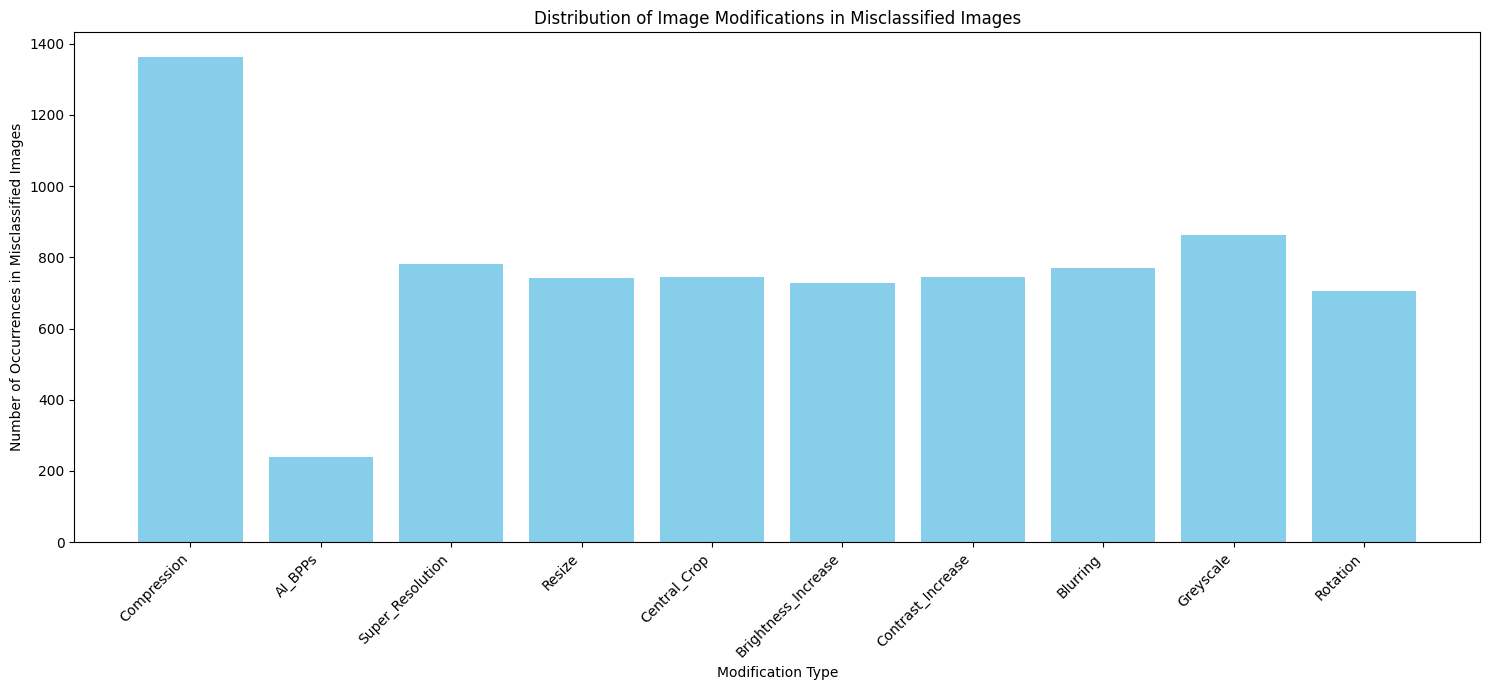

In [ ]:
modificationsNames = ["Compression","AI_BPPs","Super_Resolution","Resize","Central_Crop","Brightness_Increase","Contrast_Increase","Blurring","Greyscale","Rotation" ]

modificationsCount = {
    "Compression": 0,
    "AI_BPPs": 0,
    "Super_Resolution": 0,
    "Resize": 0,
    "Central_Crop": 0,
    "Brightness_Increase": 0,
    "Contrast_Increase": 0,
    "Blurring": 0,
    "Greyscale": 0,
    "Rotation": 0
}

print(len(misclassified_filepaths))
print(len(misclassified_filepaths))
for fileName in misclassified_filepaths:
    count =0
    for modification in modificationsNames:
        if modification.lower() in fileName.lower():
            modificationsCount[modification] = modificationsCount[modification] + 1
            count +=1
    if count == 0:
        print(fileName)


print(modificationsCount)

sum = 0
for key, value in modificationsCount.items():
    sum += modificationsCount[key]
print(sum)
print(modificationsCount)

import matplotlib.pyplot as plt

# Prepare data for plotting
modification_types = list(modificationsCount.keys())
counts = list(modificationsCount.values())

# Create the histogram
plt.figure(figsize=(15, 7))
plt.bar(modification_types, counts, color='skyblue')
plt.xlabel('Modification Type')
plt.ylabel('Number of Occurrences in Misclassified Images')
plt.title('Distribution of Image Modifications in Misclassified Images')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

2608
2608
{'Compression': 5186, 'AI_BPPs': 1000, 'Super_Resolution': 3032, 'Resize': 2956, 'Central_Crop': 2878, 'Brightness_Increase': 2876, 'Contrast_Increase': 2810, 'Blurring': 2974, 'Greyscale': 2900, 'Rotation': 2820}
29432
{'Compression': 5186, 'AI_BPPs': 1000, 'Super_Resolution': 3032, 'Resize': 2956, 'Central_Crop': 2878, 'Brightness_Increase': 2876, 'Contrast_Increase': 2810, 'Blurring': 2974, 'Greyscale': 2900, 'Rotation': 2820}


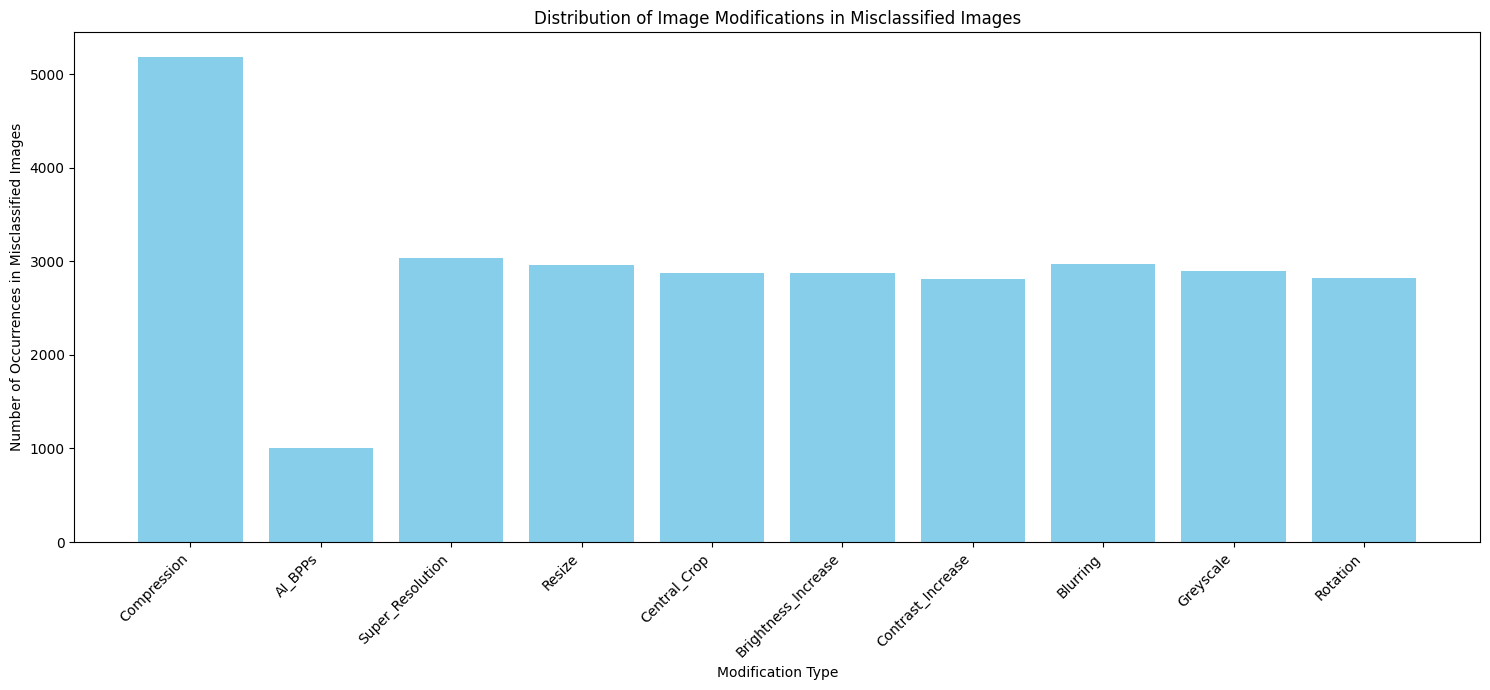

In [ ]:
modificationsNames = ["Compression","AI_BPPs","Super_Resolution","Resize","Central_Crop","Brightness_Increase","Contrast_Increase","Blurring","Greyscale","Rotation" ]

modificationsCountAll = {
    "Compression": 0,
    "AI_BPPs": 0,
    "Super_Resolution": 0,
    "Resize": 0,
    "Central_Crop": 0,
    "Brightness_Increase": 0,
    "Contrast_Increase": 0,
    "Blurring": 0,
    "Greyscale": 0,
    "Rotation": 0
}

print(len(misclassified_filepaths))
print(len(misclassified_filepaths))
for fileName in all_files_in_order:
    count =0
    for modification in modificationsNames:
        if modification.lower() in fileName.lower():
            modificationsCountAll[modification] = modificationsCountAll[modification] + 1
            count +=1
    if count == 0:
        print(fileName)


print(modificationsCountAll)

sum = 0
for key, value in modificationsCountAll.items():
    sum += modificationsCountAll[key]
print(sum)
print(modificationsCountAll)

import matplotlib.pyplot as plt

# Prepare data for plotting
modification_types = list(modificationsCountAll.keys())
counts = list(modificationsCountAll.values())

# Create the histogram
plt.figure(figsize=(15, 7))
plt.bar(modification_types, counts, color='skyblue')
plt.xlabel('Modification Type')
plt.ylabel('Number of Occurrences in Misclassified Images')
plt.title('Distribution of Image Modifications in Misclassified Images')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

Confusion Matrix for Misclassified Images (True vs. Predicted):
                                    Adobe Firefly  Dall-E 1  Dall-E 3  \
Adobe Firefly                                   0         0         1   
Dall-E 1                                        1         0         0   
Dall-E 3                                        9         0         0   
Deep AI                                         1         0         0   
Flux.1                                          1         0         0   
Flux.1.1 Pro                                    3         0         0   
Freepik                                         0         0         0   
Hotpot AI                                       5         0         0   
Leonardo AI                                    38         1         0   
Midjourney                                     19         2         3   
Nvidia Sana PAG                                 7         0         8   
Stable Cascade                                  1         0 

<Figure size 1500x1200 with 0 Axes>

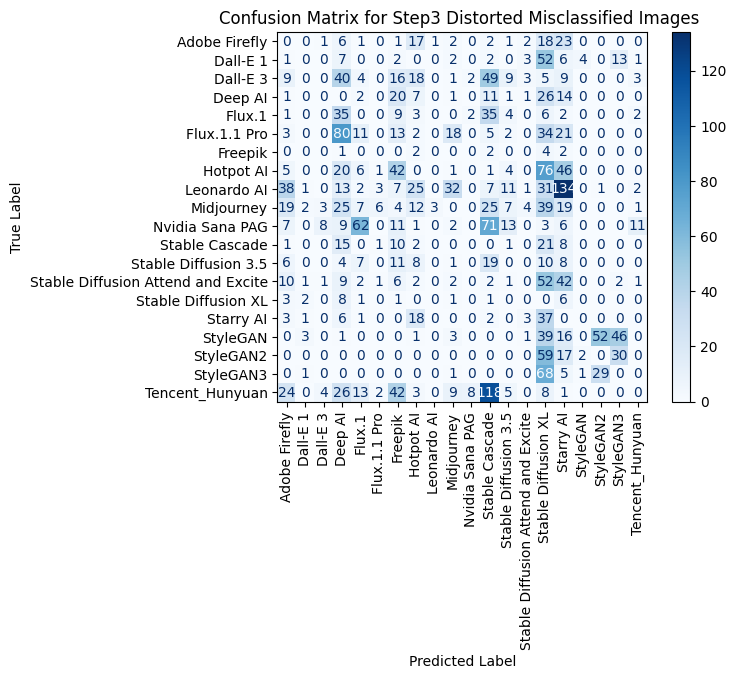

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

# Create a confusion matrix
cm = confusion_matrix(misclassified_true_labels, misclassified_predicted_labels, labels=np.arange(len(class_names)))

# Filter out rows/columns with all zeros for better visualization of actual misclassifications
# Only consider true labels that actually appear in the misclassified_true_labels
# And predicted labels that actually appear in misclassified_predicted_labels

# Get unique true and predicted labels from misclassified set
unique_mis_true_labels = np.unique(misclassified_true_labels)
unique_mis_predicted_labels = np.unique(misclassified_predicted_labels)

# Get class names for these unique labels
display_labels_true = [class_names[i] for i in unique_mis_true_labels]
display_labels_pred = [class_names[i] for i in unique_mis_predicted_labels]

# Create a confusion matrix specifically for the misclassified examples
cm_misclassified = confusion_matrix(
    misclassified_true_labels,
    misclassified_predicted_labels,
    labels=np.arange(len(class_names)) # Use all class labels to maintain order and size
)

# Convert to DataFrame for easier inspection, labeling rows/columns with class names
cm_df = pd.DataFrame(cm_misclassified, index=class_names, columns=class_names)

print("Confusion Matrix for Misclassified Images (True vs. Predicted):")
print(cm_df)

# Plotting the confusion matrix for misclassified items
plt.figure(figsize=(15, 12))
ConfusionMatrixDisplay(confusion_matrix=cm_misclassified, display_labels=class_names).plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix for Step3 Distorted Misclassified Images ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
modificationsNames = ["Compression","AI_BPPs","Super_Resolution","Resize","Central_Crop","Brightness_Increase","Contrast_Increase","Blurring","Greyscale","Rotation"]

misclassifiedModificationsCount = {
    "Compression": 0,
    "AI_BPPs": 0,
    "Super_Resolution": 0,
    "Resize": 0,
    "Central_Crop": 0,
    "Brightness_Increase": 0,
    "Contrast_Increase": 0,
    "Blurring": 0,
    "Greyscale": 0,
    "Rotation": 0
}

for fileName in misclassified_filepaths:
    # Use a flag to ensure only one modification type is counted per file if multiple are present
    # or count all if that's the intention. Given the context, counting all is more informative.
    for modification in modificationsNames:
        if modification.lower() in fileName.lower():
            misclassifiedModificationsCount[modification] = misclassifiedModificationsCount[modification] + 1


print("Misclassified Modifications Count:")
print(misclassifiedModificationsCount)

Misclassified Modifications Count:
{'Compression': 1364, 'AI_BPPs': 238, 'Super_Resolution': 781, 'Resize': 742, 'Central_Crop': 746, 'Brightness_Increase': 727, 'Contrast_Increase': 746, 'Blurring': 771, 'Greyscale': 862, 'Rotation': 705}


In [ ]:
misclassification_rates = {}

for modification in modificationsNames:
    misclassified_count = misclassifiedModificationsCount.get(modification, 0)
    total_count = modificationsCountAll.get(modification, 0)

    if total_count > 0:
        rate = (misclassified_count / total_count) * 100 # Express as percentage
    else:
        rate = 0.0 # Handle division by zero

    misclassification_rates[modification] = rate

print("Misclassification Rates per Modification Type (%):")
for mod, rate in misclassification_rates.items():
    print(f"{mod}: {rate:.2f}%")

Misclassification Rates per Modification Type (%):
Compression: 26.30%
AI_BPPs: 23.80%
Super_Resolution: 25.76%
Resize: 25.10%
Central_Crop: 25.92%
Brightness_Increase: 25.28%
Contrast_Increase: 26.55%
Blurring: 25.92%
Greyscale: 29.72%
Rotation: 25.00%


In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

# Prepare data for the contingency table
# Calculate correctly classified images for each modification type
correctly_classified_modifications_count = {}
for modification in modificationsNames:
    total_count = modificationsCountAll.get(modification, 0)
    misclassified_count = misclassifiedModificationsCount.get(modification, 0)
    correctly_classified_modifications_count[modification] = total_count - misclassified_count

# Create the contingency table
# Rows: Modification Types
# Columns: Misclassified, Correctly Classified
contingency_table = []
for modification in modificationsNames:
    contingency_table.append([
        misclassifiedModificationsCount.get(modification, 0),
        correctly_classified_modifications_count.get(modification, 0)
    ])

contingency_table = np.array(contingency_table)

print("Contingency Table (Misclassified vs. Correctly Classified per Modification Type):")
print(pd.DataFrame(contingency_table, index=modificationsNames, columns=['Misclassified', 'Correctly Classified']))

# Perform Chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-squared Statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the p-value
significance_level = 0.05


Contingency Table (Misclassified vs. Correctly Classified per Modification Type):
                     Misclassified  Correctly Classified
Compression                   1364                  3822
AI_BPPs                        238                   762
Super_Resolution               781                  2251
Resize                         742                  2214
Central_Crop                   746                  2132
Brightness_Increase            727                  2149
Contrast_Increase              746                  2064
Blurring                       771                  2203
Greyscale                      862                  2038
Rotation                       705                  2115

Chi-squared Statistic: 27.4745
P-value: 0.0012
Since the p-value (0.0012) is less than the significance level (0.05), we reject the null hypothesis.
This suggests there is a statistically significant relationship between the image modification type and the likelihood of being misclassified

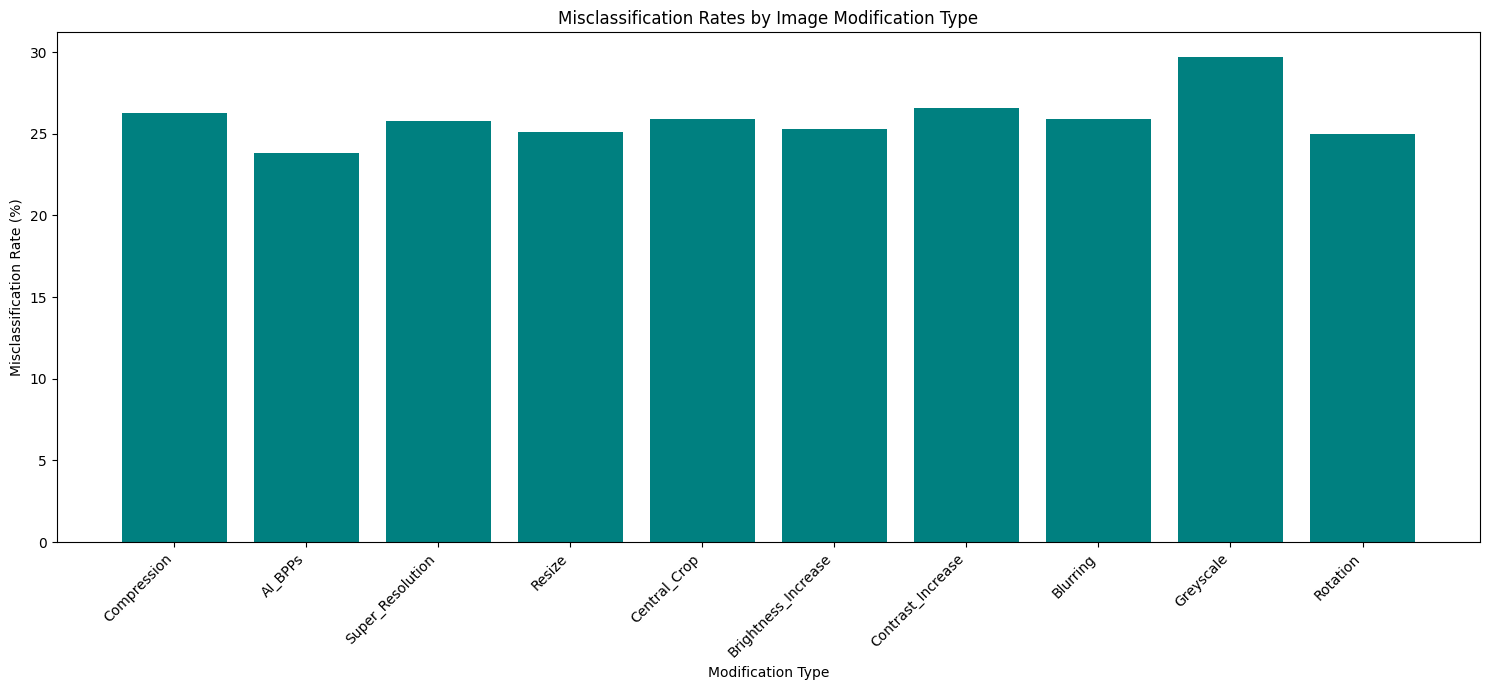

In [ ]:
import matplotlib.pyplot as plt

# Prepare data for plotting
modification_types = list(misclassification_rates.keys())
misclassification_rates_values = list(misclassification_rates.values())

# Create the bar chart
plt.figure(figsize=(15, 7))
plt.bar(modification_types, misclassification_rates_values, color='teal')

# Set labels and title
plt.xlabel('Modification Type')
plt.ylabel('Misclassification Rate (%)')
plt.title('Misclassification Rates by Image Modification Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
